# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Fery Irawan
- Email: fery21irawan.me@gmail.com
- Id Dicoding: mazafathi

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import math
import joblib

from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Menyiapkan data yang akan digunakan

In [2]:
df = pd.read_csv("data.csv", sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

**Menampilkan seluruh Kolom**

In [4]:
pd.options.display.max_columns = df.shape[1]

In [5]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Tampilkan Describe dataset**

In [6]:
df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


**Cek Duplikasi Data**

In [7]:
df.duplicated().sum()

0

**Cek Missing Value**

In [8]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


**Cek Nilai yang ada pada kolom Status**

In [9]:
print(df['Status'].unique())

['Dropout' 'Graduate' 'Enrolled']


**Menghitung Jumlah siswa berdasarkan status**

In [10]:
df['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

## Data Preparation / Preprocessing

### Mengubah Status menjadi Binary
Dikarenakan saya fokus untuk menganalisa penyebab mahasiswa dropout, maka saya mengubah nilai pada column status yang semula terdapat 3 kategori yaitu : Dropout, Enrolled, Graduated menjadi nilai binary 1 (Dropout) dan 0 (Graduated/Enrolled)

In [11]:
df['Status'] = df['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)
print(df['Status'].unique())

[1 0]


### Persiapan dataset untuk membuat bisnis dashboard

In [12]:
dashboard_df = df.copy()

**Mapping Nilai**

In [13]:
application_mode_mapping = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

# Dictionary mapping untuk course
course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

marital_status_mapping = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
}

In [14]:
dashboard_df['Application_mode'] = dashboard_df['Application_mode'].replace(application_mode_mapping)
dashboard_df['Course'] = dashboard_df['Course'].replace(course_mapping)
dashboard_df['Marital_status'] = dashboard_df['Marital_status'].replace(marital_status_mapping)

In [15]:
dashboard_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,single,International student (bachelor),1,Tourism,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,single,1st phase - general contingent,5,Communication Design,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,single,2nd phase - general contingent,2,Journalism and Communication,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,married,Over 23 years old,1,Social Service (evening attendance),0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


**Export dataframe sebagai data source untuk menampilkan bisnis dashboard**

In [16]:
dashboard_df.to_csv('student.csv', index=False)

## Explorasi Data Analisis

**Melakukan Analisis dengan menampilkan perbandingan data antara siswa yang dropout dan tidak**

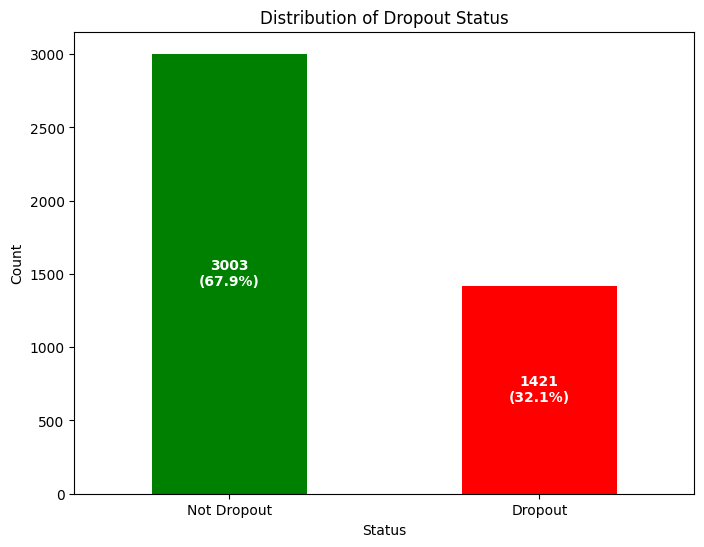

In [17]:
status_counts = df['Status'].value_counts()

status_percentages = (status_counts / status_counts.sum()) * 100

plt.figure(figsize=(8, 6))
ax = status_counts.plot(kind='bar', color=['green', 'red'])

plt.title('Distribution of Dropout Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Dropout', 'Dropout'], rotation=0)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}\n({height / len(df) * 100:.1f}%)', 
                (p.get_x() + p.get_width() / 2., height / 2),
                ha='center', va='center', color='white', weight='bold')

plt.show()

**Melakukan Analisis dengan menampilkan korelasi antar column**

In [18]:
 correlation_matrix = df.corr(method='pearson').round(2)

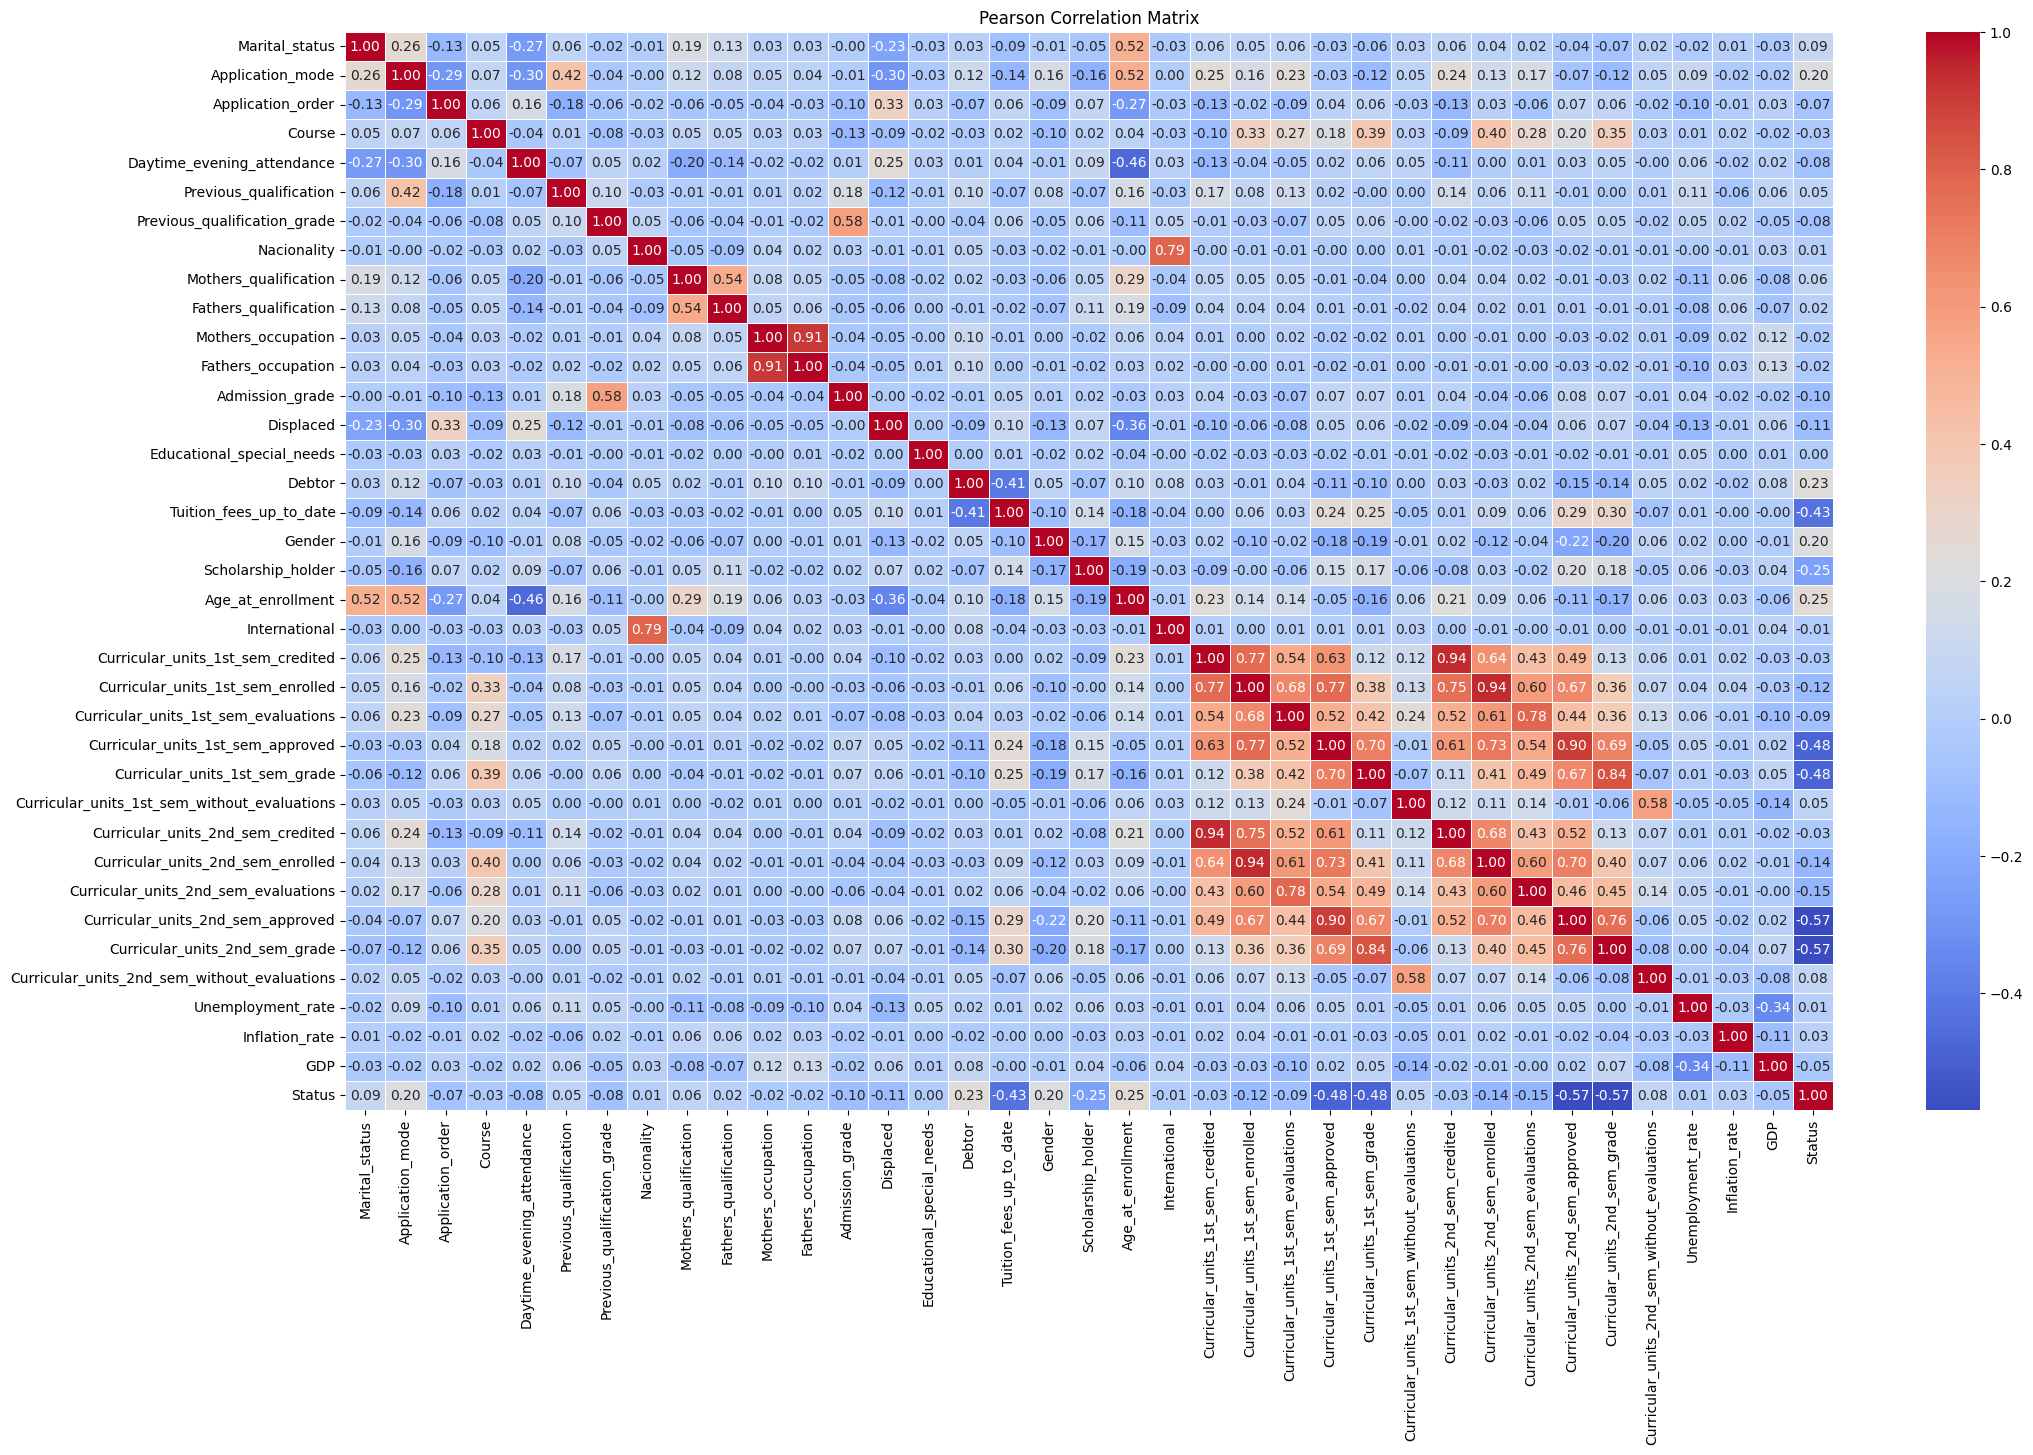

In [19]:
plt.figure(figsize=(24, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Matrix')
plt.show()

**Mengidentifikasi fitur-fitur yang memiliki hubungan tinggi dengan column status**

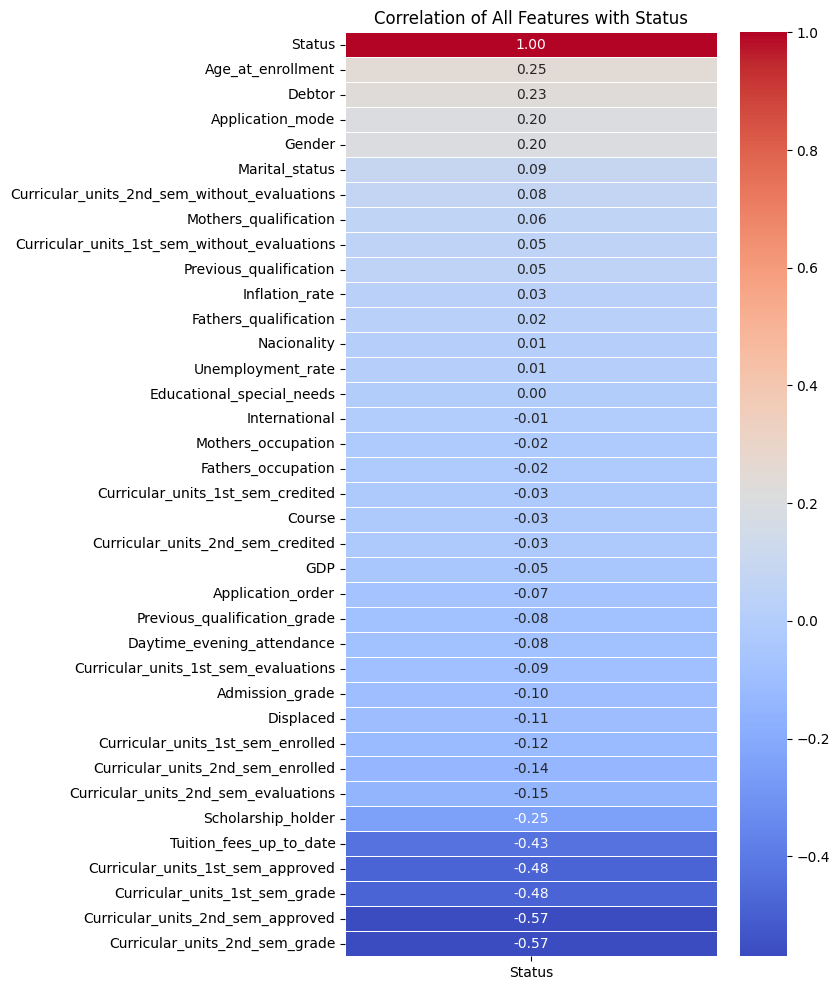

In [24]:
correlation_with_status = correlation_matrix['Status']

correlation_table = pd.DataFrame(correlation_with_status).sort_values(ascending=False, by=['Status'])

plt.figure(figsize=(6, 12))

sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation of All Features with Status')

plt.show()

**Melakukan analisa siswa yang dropout dengan visualisasi data**

In [25]:
dropout_data = df[df['Status'] == 1]

In [26]:
def plot_student_dropout(df, column, sort=False):
    if sort is not None:
        return df.groupby(column).size().sort_values(ascending=sort)
    else:
        return df.groupby(column).size()

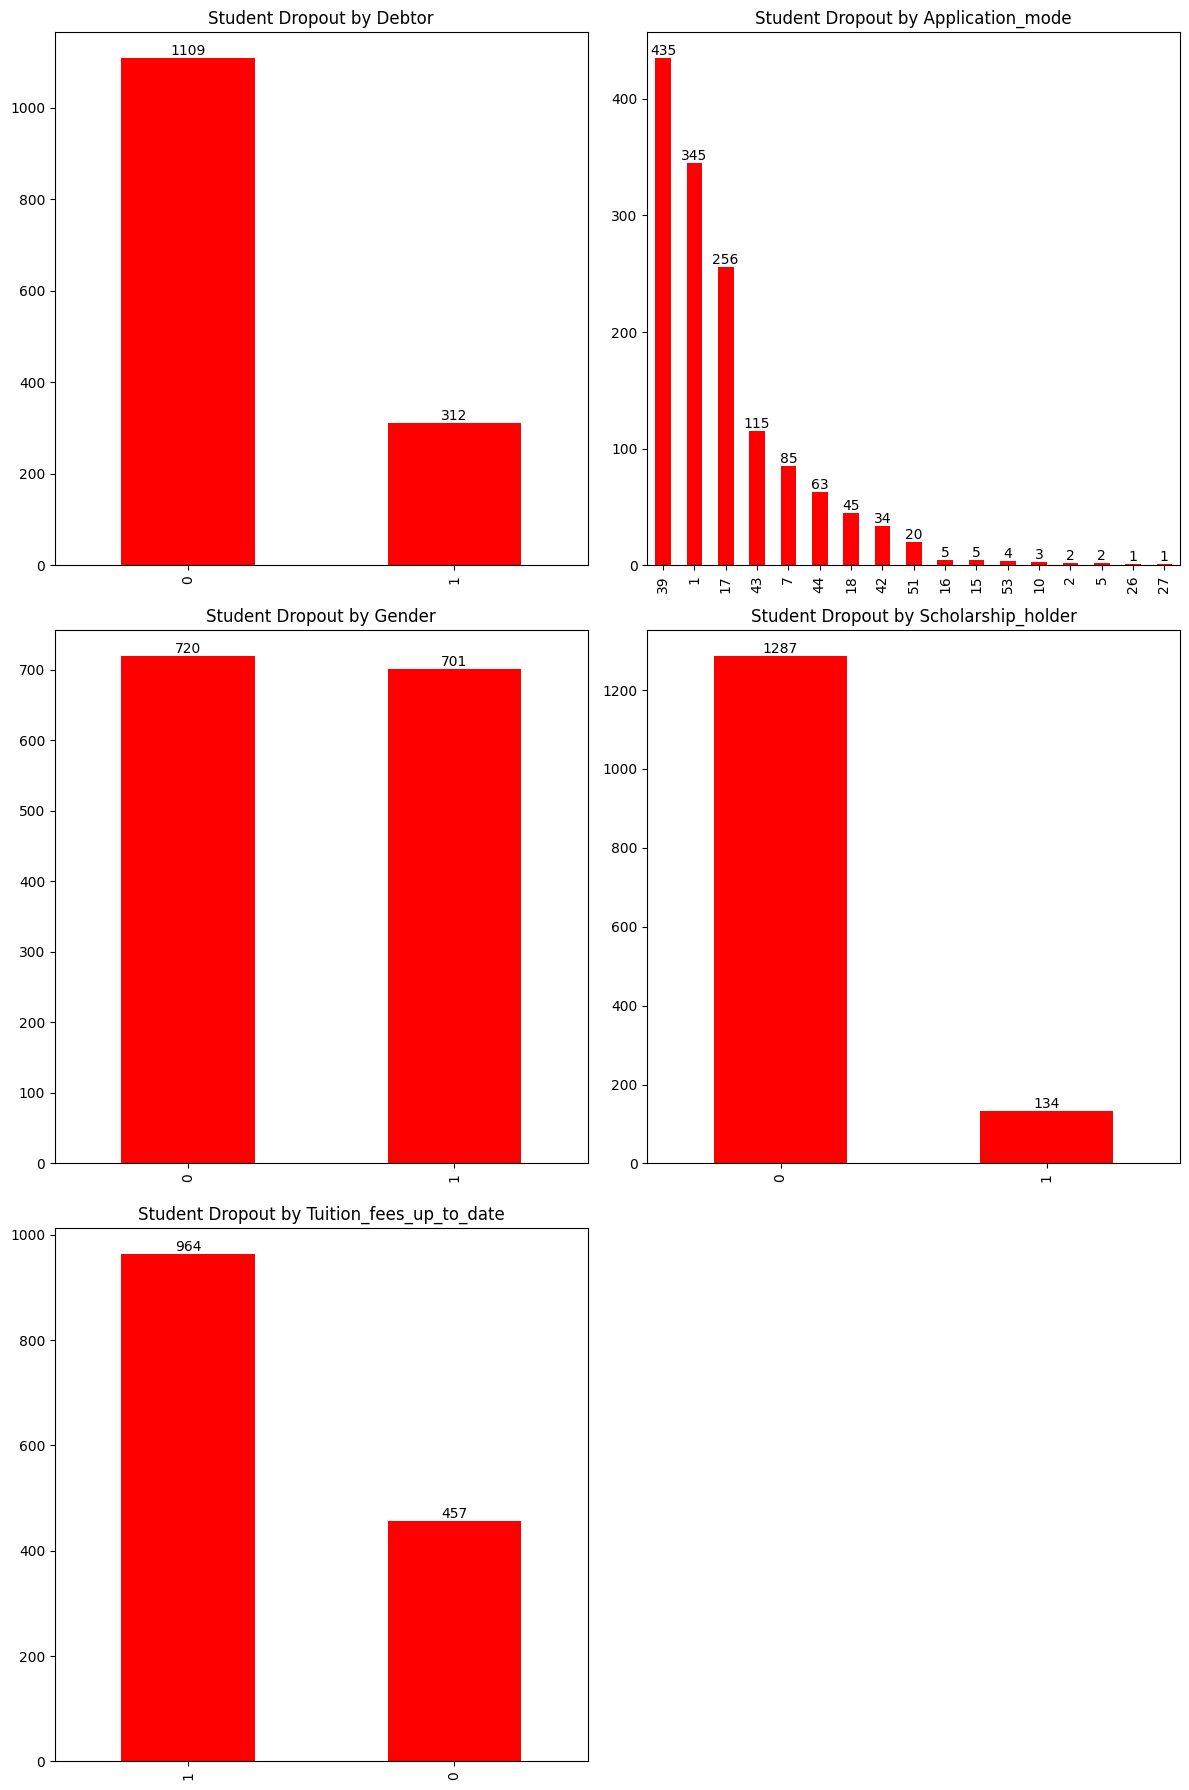

In [27]:
cols = [
    'Debtor', 'Application_mode', 'Gender', 
    'Scholarship_holder', 'Tuition_fees_up_to_date'
]

ncols = min(2, len(cols))

nrows = math.ceil(len(cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 6))

axes = axes.flatten()

for i, column in enumerate(cols):
    ax = axes[i]
    data = plot_student_dropout(dropout_data, column)
    data.plot(kind='bar', ax=ax, color='red', title=f'Student Dropout by {column}')
    ax.set_xlabel(None)

    for index, value in enumerate(data):
        ax.text(index, value, str(value), ha='center', va='bottom')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])



plt.tight_layout()
plt.show()

In [28]:
dropout_data['Age_at_enrollment'].agg(['min', 'max'])

min    18
max    70
Name: Age_at_enrollment, dtype: int64

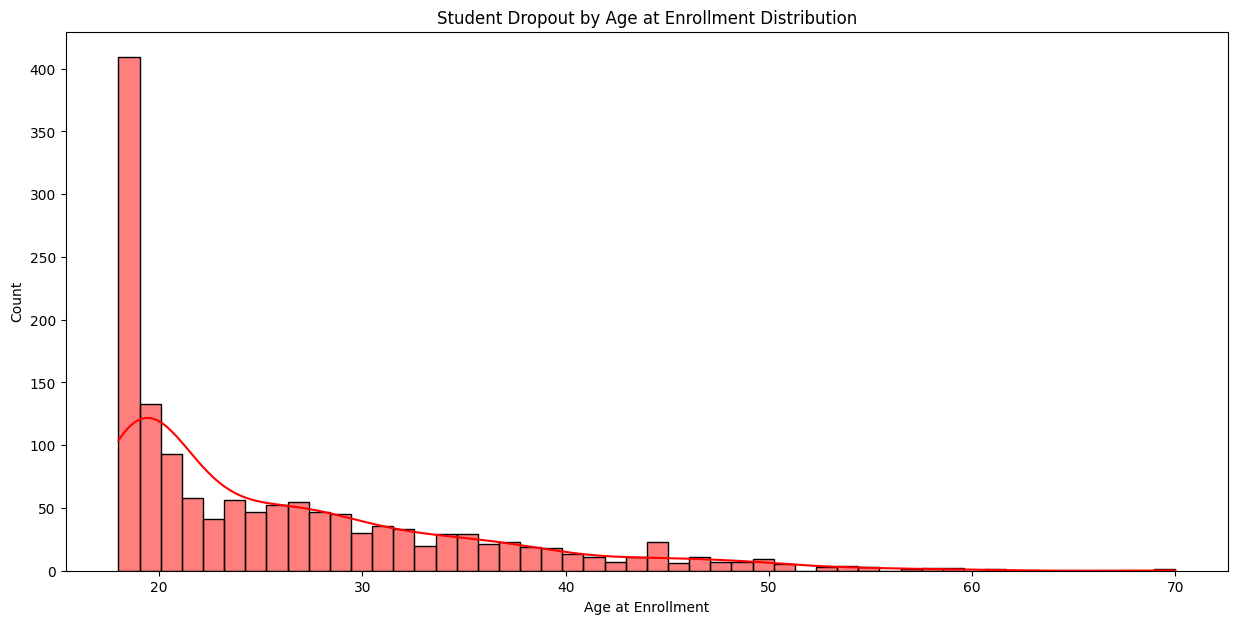

In [31]:
plt.figure(figsize=(15, 7))
ax = sns.histplot(dropout_data['Age_at_enrollment'], bins=50, color='r', kde=True)
ax.set_title('Student Dropout by Age at Enrollment Distribution')
ax.set_xlabel('Age at Enrollment')
ax.set_ylabel('Count')
plt.show()

In [32]:
def plot_student_dropout_by_age_group(df, age_col='Age_at_enrollment'):
    
    df_copy = df.copy()
    
    bins = [18, 20, 30, 50, 65, np.inf]
    labels = ['18-19', '20-29', '30-49', '50-65', '65+']
    
    df_copy['age_group'] = pd.cut(df[age_col], bins=bins, labels=labels, right=False)
    
    age_dist = df_copy['age_group'].value_counts().sort_index()

    plt.figure(figsize=(14, 8))
    age_dist.plot(kind='bar', color='red')
    
    for i, val in enumerate(age_dist):
        plt.text(i, val+1, str(val), ha='center', va='bottom')
        
    plt.title('Distribution of Students Dropout by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Students')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

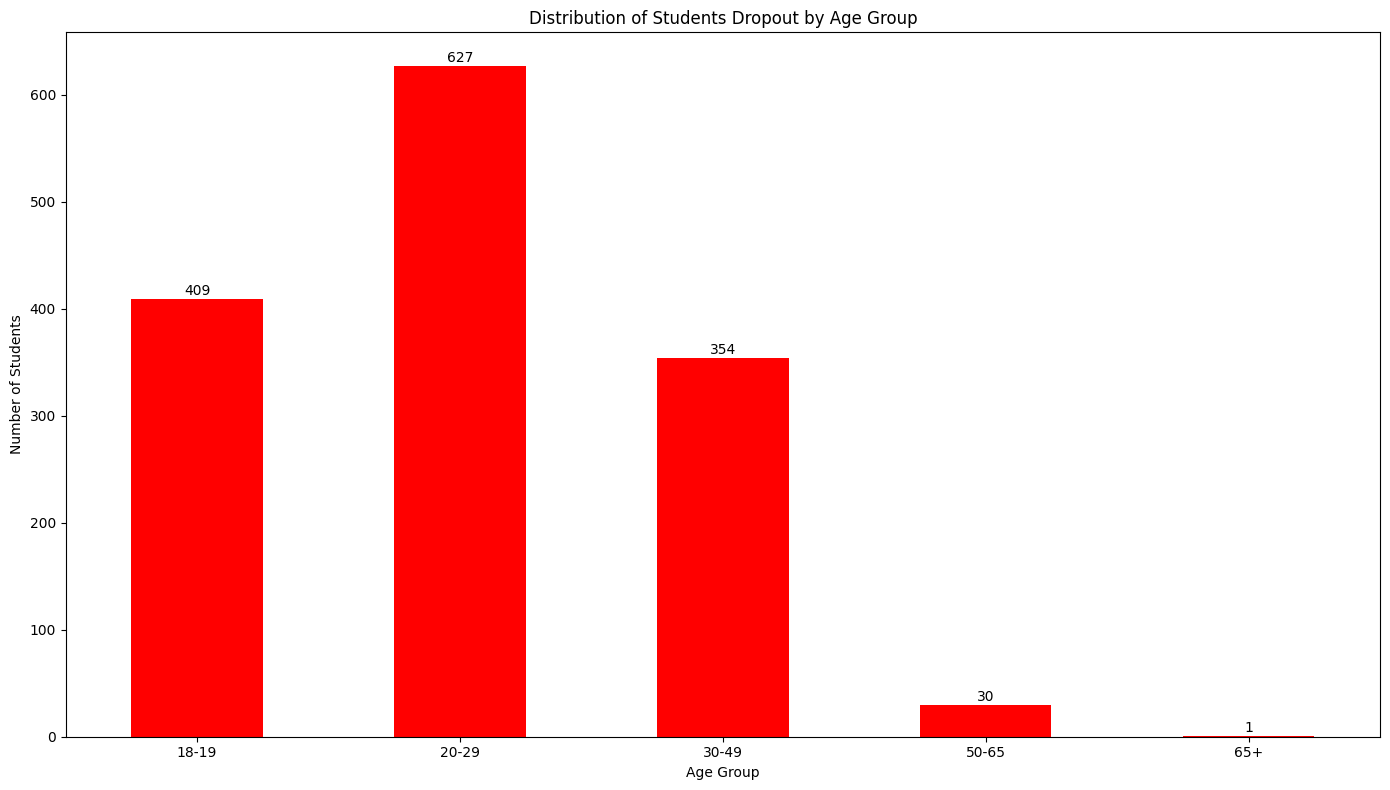

In [33]:
plot_student_dropout_by_age_group(dropout_data)

**pengecekan nilai semester mahasiswa berdasarkan nilai min,max,median,mean**

In [160]:
feature = ['Curricular_units_2nd_sem_approved', 
           'Curricular_units_2nd_sem_grade',
           'Curricular_units_1st_sem_approved',
           'Curricular_units_1st_sem_grade'
          ]

In [161]:
df[feature].agg(['min', 'max', 'median', 'mean'])

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade
min,0.000000,0.000000,0.0000,0.000000
max,20.000000,18.571429,26.0000,18.875000
median,5.000000,12.200000,5.0000,12.285714
mean,4.435805,10.230206,4.7066,10.640822


**Cek perbandingan nilai semester antara mahasiswa yang dropout dan tidak berdasarkan nilai min,max,median,mean**

In [162]:
dropout_agg = df[df['Status'] == 1][feature].agg(['min', 'max', 'median', 'mean'])

non_dropout_agg = df[df['Status'] == 0][feature].agg(['min', 'max', 'median', 'mean'])

pd.concat([dropout_agg, non_dropout_agg], axis=0, keys=['Dropout', 'Non-Dropout'])

Curricular_units_2nd_sem_approved  \
Dropout     min                              0.000000   
            max                             16.000000   
            median                           0.000000   
            mean                             1.940183   
Non-Dropout min                              0.000000   
            max                             20.000000   
            median                           6.000000   
            mean                             5.616717   

                    Curricular_units_2nd_sem_grade  \
Dropout     min                           0.000000   
            max                          17.714286   
            median                        0.000000   
            mean                          5.899339   
Non-Dropout min                           0.000000   
            max                          18.571429   
            median                       12.750000   
            mean                         12.279544   

                    Curricular_units_1st_sem_approved  \
Dropout     min                              0.000000   
            max                             21.000000   
            median                           2.000000   
            mean                             2.551724   
Non-Dropout min                              0.000000   
            max                             26.000000   
            median                           6.000000   
            mean                             5.726274   

                    Curricular_units_1st_sem_grade  
Dropout     min                           0.000000  
            max                          18.000000  
            median                       10.928571  
            mean                          7.256656  
Non-Dropout min                           0.000000  
            max                          18.875000  
            median                       12.714286  
            mean                         12.242187

**Visualisasi data perbandingan nilai semester**

In [313]:
def plot_comparison(df, features):
    
    dropout_df = df[df['Status'] == 1]
    non_dropout_df = df[df['Status'] == 0]

    def calculate_stats(feature, dropout_df, non_dropout_df):
        stats = {
            'dropout': dropout_df[feature].agg(['min', 'max', 'mean', 'median']),
            'non_dropout': non_dropout_df[feature].agg(['min', 'max', 'mean', 'median'])
        }
        return pd.DataFrame(stats)

    num_features = len(features)
    fig, axes = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(14, 6 * ((num_features + 1) // 2)))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        stats_df = calculate_stats(feature, dropout_df, non_dropout_df)
        stats_df.plot(kind='bar', ax=axes[i], color=['red', 'green'])
        axes[i].set_title('Comparison of Min, Max, Mean, and Median')
        axes[i].text(0.5, 1.08, f'{feature}', ha='center', va='bottom', transform=axes[i].transAxes, fontsize=14, fontweight='bold')
        axes[i].set_ylabel('Values')
        axes[i].set_xlabel('Statistical Measures')
        axes[i].legend(title='Status', labels=['Dropout', 'Non-Dropout'])

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

**Menampilkan Visualisasi**

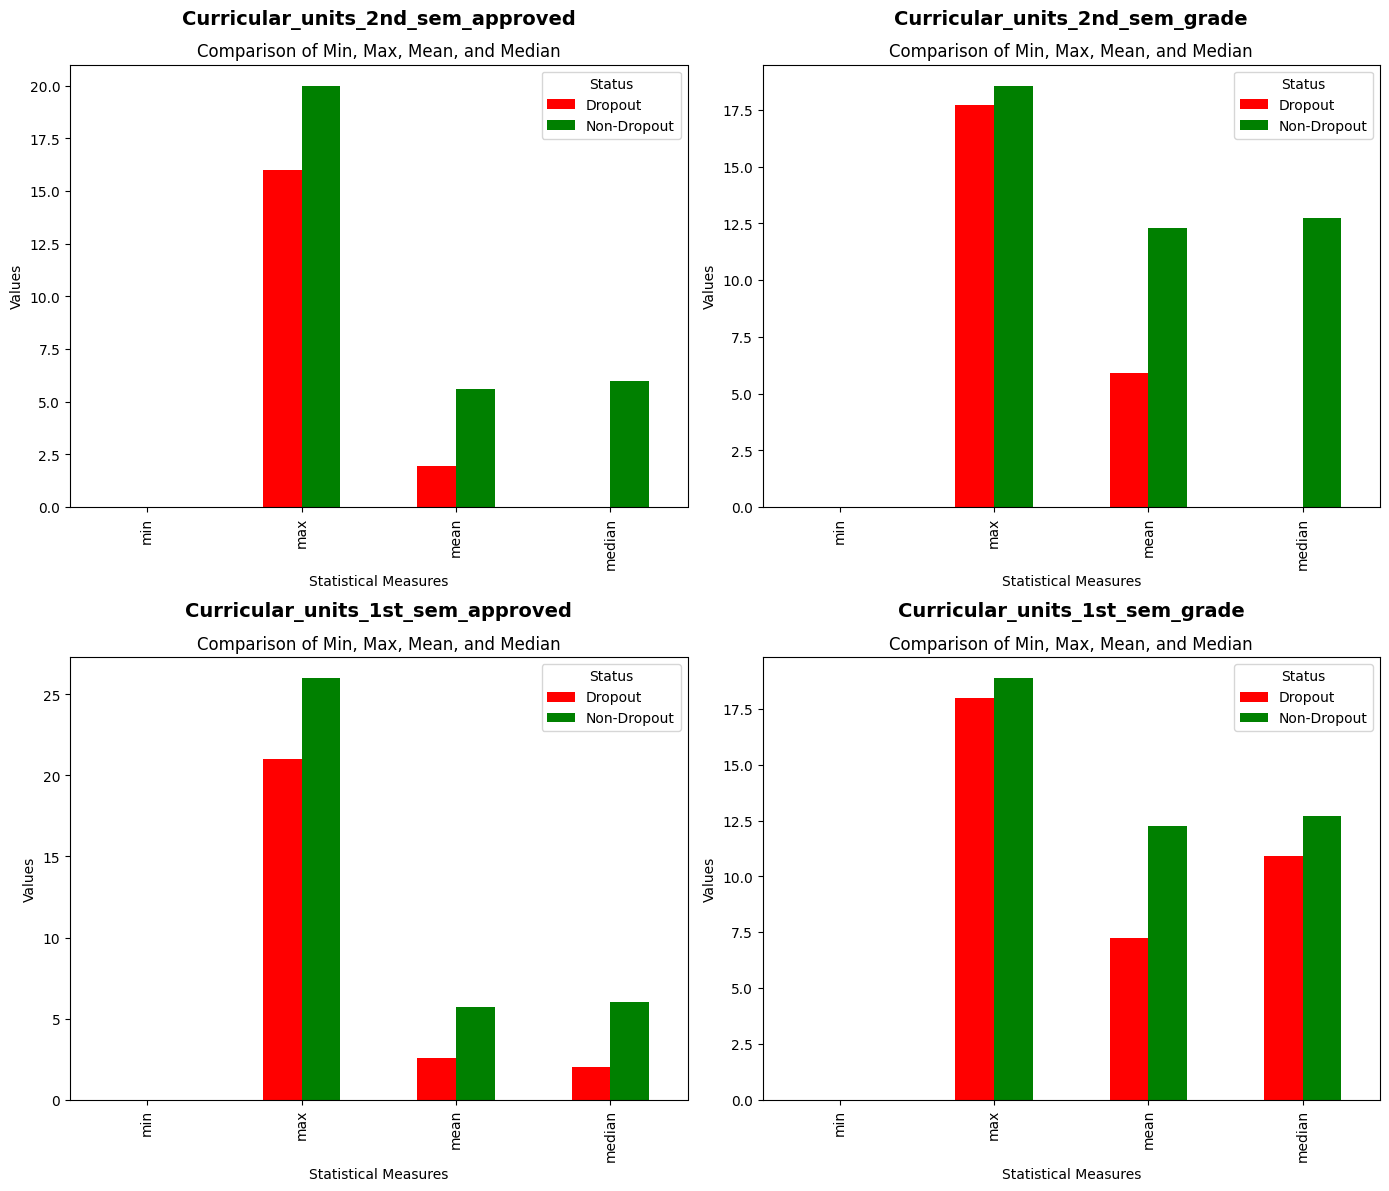

In [314]:
plot_comparison(df, feature)

## Modeling

**Menyeleksi fitur-fitur yang memiliki nilai relevan**

In [235]:
feature_selection = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Application_mode',
    'Gender',
    'Age_at_enrollment',
    'Debtor',
    'Status'
]

In [236]:
new_df = df[feature_selection]
new_df.head()

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Application_mode,Gender,Age_at_enrollment,Debtor,Status
0,0,0.000000,0,0.000000,1,0,17,1,20,0,1
1,6,13.666667,6,14.000000,0,0,15,1,19,0,0
2,0,0.000000,0,0.000000,0,0,1,1,19,0,1
3,5,12.400000,6,13.428571,1,0,17,0,20,0,0
4,6,13.000000,5,12.333333,1,0,39,0,45,0,0


**buat salinan dataset untuk pengecekan imbalance dataset**

In [237]:
new_cleaned_df = new_df.copy()

In [238]:
train_df, test_df = train_test_split(new_cleaned_df, test_size=0.2, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [239]:
print(train_df.shape)
print(test_df.shape)

(3539, 11)
(885, 11)


**Cek perbandingan pada data latih berdasarkan status**

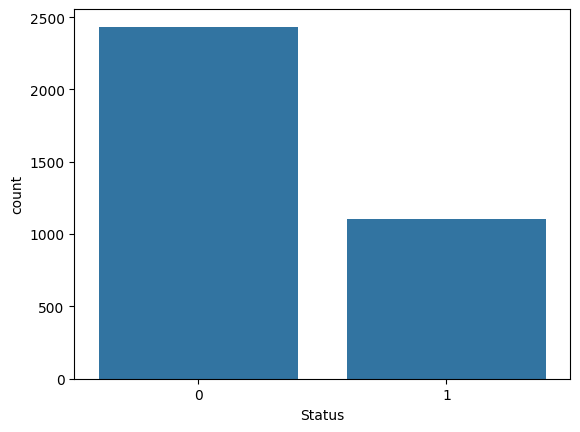

In [240]:
sns.countplot(data=train_df, x="Status")
plt.show()

In [242]:
train_df.Status.value_counts()

Status
0    2434
1    1105
Name: count, dtype: int64

**Melakukan teknik oversampling untuk mengatasi imbalance data pada data latih**

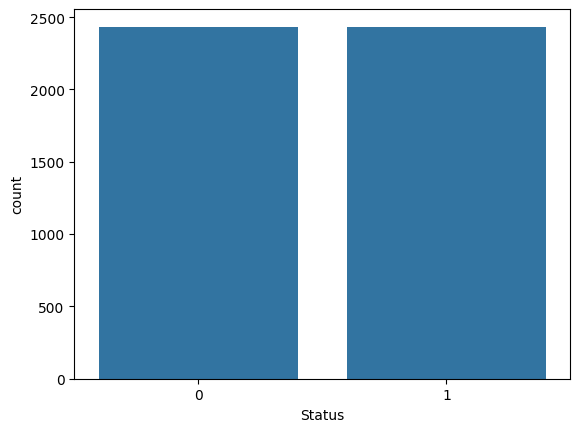

In [243]:
df_majority_1 = train_df[(train_df.Status == 0)]
df_minority = train_df[(train_df.Status == 1)]

df_minority_oversampled = resample(df_minority, n_samples=2434, random_state=42)

oversampled_train_df = pd.concat([df_majority_1, df_minority_oversampled]).reset_index(drop=True)
oversampled_train_df = shuffle(oversampled_train_df, random_state=42)
oversampled_train_df.reset_index(drop=True, inplace=True)
 
sns.countplot(data=oversampled_train_df, x="Status")
plt.show()

In [244]:
X_train = oversampled_train_df.drop(columns="Status", axis=1)
y_train = oversampled_train_df["Status"]
 
X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

**Scale data**

In [245]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Hyperparameter tuning menggunakan GridSearchCV**

In [246]:
model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}
 
CV_tree = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

CV_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [247]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


**Menerapkan Hyperparameter ke model**

In [248]:
model = RandomForestClassifier(
    random_state=123, 
    max_depth=8, 
    n_estimators=500, 
    max_features='sqrt', 
    criterion='gini', 
    n_jobs=-1
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Evaluation

In [249]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Akurasi: {round(accuracy,2)}')

Akurasi: 0.85


## Export Model

In [250]:
model_and_scaler = {
    'model': model,
    'scaler': scaler
}

joblib.dump(model_and_scaler, 'model.joblib')

['model.joblib']